In [1]:
# Importing Packages
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import plotly.offline as py



In [2]:
# Importing the data
tweet_json = open('tweets_ws22_v1.json')
data = json.load(tweet_json)

print("Number of Tweets:" , len(data))

Number of Tweets: 16949


In [3]:
# exploring data
tweetID = 0
print("Tweet", data[tweetID]["text"])
print("Component:", data[tweetID]["labels"]["topic"][0]['topic'])
print("Sentiment:", data[tweetID]["labels"]["sentiment"][0]['sentiment'])

tweet_json.close()

Tweet @DSisourath The Thameslink core between London St Pancras and London Blackfriars in rush hours onlybut the in cab rubbish rarely works
Component: service
Sentiment: negative


In [4]:
#Converting json to pandas dataframe
df = pd.DataFrame.from_dict(data)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source_created_at  16949 non-null  object 
 1   author_id          16949 non-null  object 
 2   text               16949 non-null  object 
 3   source             16949 non-null  object 
 4   language           16949 non-null  object 
 5   longitude          1425 non-null   float64
 6   latitude           1425 non-null   float64
 7   id                 16949 non-null  object 
 8   labels             16949 non-null  object 
 9   source_id          15548 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.3+ MB


# Creating a final datframe for nested dictionaries within columns


In [6]:
label = df['labels'].apply(pd.Series)
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   topic      16949 non-null  object
 1   sentiment  16949 non-null  object
dtypes: object(2)
memory usage: 265.0+ KB


In [7]:
topic = label['topic'].apply(pd.Series)
topic.info()
topics = topic[0].apply(pd.Series)
topics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       16949 non-null  object
dtypes: object(1)
memory usage: 132.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet_id      16949 non-null  object
 1   user_id       16949 non-null  object
 2   relevant      16949 non-null  bool  
 3   topic         16949 non-null  object
 4   ground_truth  16949 non-null  bool  
 5   id            16949 non-null  object
dtypes: bool(2), object(4)
memory usage: 562.9+ KB


In [8]:
sentiment = label['sentiment'].apply(pd.Series)
sentiment.info()
sentiments = sentiment[0].apply(pd.Series)
sentiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       16949 non-null  object
dtypes: object(1)
memory usage: 132.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet_id      16949 non-null  object
 1   user_id       16949 non-null  object
 2   sentiment     16949 non-null  object
 3   ground_truth  16949 non-null  bool  
 4   id            16949 non-null  object
dtypes: bool(1), object(4)
memory usage: 546.3+ KB


In [9]:
label_data = pd.concat([topics, sentiments], axis=1)
label_data.info()
labels = label_data.loc[:,~label_data.columns.duplicated()]
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet_id      16949 non-null  object
 1   user_id       16949 non-null  object
 2   relevant      16949 non-null  bool  
 3   topic         16949 non-null  object
 4   ground_truth  16949 non-null  bool  
 5   id            16949 non-null  object
 6   tweet_id      16949 non-null  object
 7   user_id       16949 non-null  object
 8   sentiment     16949 non-null  object
 9   ground_truth  16949 non-null  bool  
 10  id            16949 non-null  object
dtypes: bool(3), object(8)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet_id      16949 non-null  object
 1   user_id       16949 non-null  object
 2   relevant      1

In [10]:
tweet_data = pd.concat([df, labels], axis=1)
tweet1 = tweet_data.loc[:,~tweet_data.columns.duplicated()]
tweet = tweet1.drop(columns=["labels"])
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source_created_at  16949 non-null  object 
 1   author_id          16949 non-null  object 
 2   text               16949 non-null  object 
 3   source             16949 non-null  object 
 4   language           16949 non-null  object 
 5   longitude          1425 non-null   float64
 6   latitude           1425 non-null   float64
 7   id                 16949 non-null  object 
 8   source_id          15548 non-null  object 
 9   tweet_id           16949 non-null  object 
 10  user_id            16949 non-null  object 
 11  relevant           16949 non-null  bool   
 12  topic              16949 non-null  object 
 13  ground_truth       16949 non-null  bool   
 14  sentiment          16949 non-null  object 
dtypes: bool(2), float64(2), object(11)
memory usage: 1.7+ MB


In [11]:
tweet.shape

(16949, 15)

In [12]:
tweet.head()

,source_created_at,author_id,text,source,language,longitude,latitude,id,source_id,tweet_id,user_id,relevant,topic,ground_truth,sentiment
0,2020-09-18 21:56:20.798000,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,NaN,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,True,service,True,negative
1,2020-10-13 07:31:53.122000,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,NaN,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,negative
2,2020-10-26 19:27:24.695000,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,NaN,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,True,toilets,True,negative
3,2020-10-26 19:28:49.281000,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,NaN,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,True,toilets,True,negative
4,2020-09-28 11:59:41.212000,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,NaN,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,True,seats,True,neutral


In [13]:
tweet.duplicated('text').sum()

1200

In [14]:
tweet_dd =tweet.drop_duplicates()

In [15]:
pd.DataFrame(tweet_dd)

,source_created_at,author_id,text,source,language,longitude,latitude,id,source_id,tweet_id,user_id,relevant,topic,ground_truth,sentiment
0,2020-09-18 21:56:20.798000,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,NaN,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,True,service,True,negative
1,2020-10-13 07:31:53.122000,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,NaN,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,negative
2,2020-10-26 19:27:24.695000,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,NaN,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,True,toilets,True,negative
3,2020-10-26 19:28:49.281000,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,NaN,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,True,toilets,True,negative
4,2020-09-28 11:59:41.212000,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,NaN,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,True,seats,True,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16944,2019-07-11 07:34:35,24940900,Haha oh man the audio corruption on @TLRailUK ...,brandwatch,en-GB,NaN,NaN,b47948df-1732-7021-ee77-238f839a2ea0,1149220424313708544,b47948df-1732-7021-ee77-238f839a2ea0,Z003XDCS,True,announcements,True,neutral
16945,2020-08-10 11:19:10.181000,63559912,@TLRailUK SweetIs there a plug to charge my ph...,sprinklr,en,-0.12574,51.50853,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,NaN,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,Z003XDCS,True,plugs,True,neutral
16946,2020-08-29 09:51:10.833000,277455263,@TLRailUK now there are far fewer commuters ha...,sprinklr,en,-0.12574,51.50853,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,NaN,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,Z003XDCS,True,tables,True,neutral
16947,2020-11-02 12:06:06.967000,3050957613,@geofftech I am voting for Thameslink. 1. in a...,sprinklr,en,-0.12574,51.50853,859ab156-cad3-3bf0-4b6d-de494b483501,NaN,859ab156-cad3-3bf0-4b6d-de494b483501,Z003XDCS,True,toilets,True,neutral


In [16]:
tweet_dd.shape

(16731, 15)

In [17]:
tweet.value_counts('topic')

topic
delays                       9023
none                         2304
service                       884
station                       754
wifi                          620
train_general                 385
covid                         375
announcements                 315
seats                         283
toilets                       282
vandalism                     273
tickets/seat_reservations     273
air conditioning              252
doors                         197
tables                        189
hvac                          172
plugs                         135
noise                          77
windows                        50
floor                          45
brakes                         44
roof                           15
handrails                       2
dtype: int64

In [18]:
tweet_dd.isnull().sum()

source_created_at        0
author_id                0
text                     0
source                   0
language                 0
longitude            15333
latitude             15333
id                       0
source_id             1374
tweet_id                 0
user_id                  0
relevant                 0
topic                    0
ground_truth             0
sentiment                0
dtype: int64

In [19]:
# Plotting the sentiments of tweet_dd
color = sns.color_palette()
%matplotlib inline
py.init_notebook_mode(connected=True)

# Plotting the histogram
fig = px.histogram(tweet_dd, x="sentiment")

fig.update_traces(marker_color="orange",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Sentiment distribution based on Tweets',xaxis_title="Sentiment",
    yaxis_title="Frequency")
fig.show()

In [20]:
# Plotting the sentiments
color = sns.color_palette()
%matplotlib inline
py.init_notebook_mode(connected=True)

# Plotting the histogram
fig = px.histogram(tweet, x="sentiment")

fig.update_traces(marker_color="orange",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Sentiment distribution based on Tweets',xaxis_title="Sentiment",
    yaxis_title="Frequency")
fig.show()

In [21]:
# Plotting the histogram
fig = px.histogram(tweet, x="topic")
fig.update_traces(marker_color="orange",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Topics based on tweets',xaxis_title="Components",
    yaxis_title="Frequency")
fig.show()

In [22]:
# Plotting tweets without delay component
tweetnodelay = tweet[tweet["topic"] != "delays"]
# Plotting the histogram
# Product Scores
fig = px.histogram(tweetnodelay, x="topic")
fig.update_traces(marker_color="orange",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Topics except Delays based on tweets',xaxis_title="Components",
    yaxis_title="Frequency")
fig.show()

In [23]:
tweets = tweet[["text","sentiment"]].copy()

In [24]:
tweets

,text,sentiment
0,@DSisourath The Thameslink core between London...,negative
1,@DulwichHistory Loving the complaint about peo...,negative
2,@SW_Help .And yet you have no toilets on some ...,negative
3,@SW_Help you have no toilets on some of your t...,negative
4,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,neutral
...,...,...
16944,Haha oh man the audio corruption on @TLRailUK ...,neutral
16945,@TLRailUK SweetIs there a plug to charge my ph...,neutral
16946,@TLRailUK now there are far fewer commuters ha...,neutral
16947,@geofftech I am voting for Thameslink. 1. in a...,neutral


In [25]:
tweets2 = tweets.drop_duplicates()

In [26]:
tweets2

,text,sentiment
0,@DSisourath The Thameslink core between London...,negative
1,@DulwichHistory Loving the complaint about peo...,negative
2,@SW_Help .And yet you have no toilets on some ...,negative
3,@SW_Help you have no toilets on some of your t...,negative
4,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,neutral
...,...,...
16943,At St. Alban's City has the PIS Screen firmwar...,neutral
16944,Haha oh man the audio corruption on @TLRailUK ...,neutral
16945,@TLRailUK SweetIs there a plug to charge my ph...,neutral
16946,@TLRailUK now there are far fewer commuters ha...,neutral


In [27]:
tweets2.to_csv("tweets.csv")

In [28]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; 

import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [29]:
### Tokenization

In [30]:
#lowercase & puntuation
def lowerPunc(element):
    s = ''.join([char for char in element.lower() if char.isalpha() or char.isspace()])
    return s

tweets2['text'] =tweets2['text'].apply(lowerPunc)
tweets2.head()

C:\Users\Ekin\AppData\Local\Temp/ipykernel_9560/3466909971.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,text,sentiment
0,dsisourath the thameslink core between london ...,negative
1,dulwichhistory loving the complaint about peop...,negative
2,swhelp and yet you have no toilets on some of ...,negative
3,swhelp you have no toilets on some of your tra...,negative
4,speedysticks mrneiljh tlrailuk christianwolmar...,neutral


In [31]:
import nltk
from nltk.stem.porter import PorterStemmer

In [33]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ekin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [34]:
#Tokenization
tweets2['text']= tweets2['text'].apply(nltk.word_tokenize)

C:\Users\Ekin\AppData\Local\Temp/ipykernel_9560/1344604748.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
tweets2.head(100)

,text,sentiment
0,"[dsisourath, the, thameslink, core, between, l...",negative
1,"[dulwichhistory, loving, the, complaint, about...",negative
2,"[swhelp, and, yet, you, have, no, toilets, on,...",negative
3,"[swhelp, you, have, no, toilets, on, some, of,...",negative
4,"[speedysticks, mrneiljh, tlrailuk, christianwo...",neutral
...,...,...
98,"[peoplesvote, peterborough, has, a, coach, for...",neutral
99,"[peterborough, rail, commuters, were, among, t...",negative
100,"[pottersbar, all, lines, have, reopened, at, p...",negative
101,"[pottersbar, delays, to, great, northern, and,...",negative


In [42]:
from nltk.corpus import stopwords


In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ekin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [45]:
def remove_stopwords(txt_arr):
    sw = stopwords.words('english')
    return [w for w in txt_arr if w not in sw]

tweets2['text'] = tweets2['text'].apply(remove_stopwords)

C:\Users\Ekin\AppData\Local\Temp/ipykernel_9560/2005776321.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
### 3.4 Stemming and Lemmatization

In [47]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [48]:
stem = PorterStemmer()
def stemmer(txt_arr):
    return [stem.stem(w) for w in txt_arr]

lem = WordNetLemmatizer()
def lemma(txt_arr):
    return [lem.lemmatize(w) for w in txt_arr]

In [50]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ekin\AppData\Roaming\nltk_data...


True

In [51]:
#must run the below code for the first time use limmatize
nltk.download('omw-1.4')
#Suggest to use lemmatize instead stemmer

tweets2['text'] = tweets2['text'].apply(lemma)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ekin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\Ekin\AppData\Local\Temp/ipykernel_9560/3193037515.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
### POS(Part of Speech) Tagging

In [53]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

In [55]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ekin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [56]:
tweets2['text'].apply(nltk.pos_tag)

0        [(dsisourath, NN), (thameslink, NN), (core, NN...
1        [(dulwichhistory, NN), (loving, VBG), (complai...
2        [(swhelp, NN), (yet, RB), (toilet, RB), (train...
3        [(swhelp, NN), (toilet, NN), (train, VBP), (li...
4        [(speedysticks, NNS), (mrneiljh, VBP), (tlrail...
                               ...                        
16943    [(st, JJ), (albans, NNS), (city, NN), (pi, VBP...
16944    [(haha, NN), (oh, MD), (man, NN), (audio, VB),...
16945    [(tlrailuk, NN), (sweetis, NN), (plug, NN), (c...
16946    [(tlrailuk, NN), (far, RB), (fewer, JJR), (com...
16947    [(geofftech, NN), (voting, NN), (thameslink, V...
Name: text, Length: 15781, dtype: object

In [57]:
tweets2.head()

,text,sentiment
0,"[dsisourath, thameslink, core, london, st, pan...",negative
1,"[dulwichhistory, loving, complaint, people, wa...",negative
2,"[swhelp, yet, toilet, train, like, dorking, wa...",negative
3,"[swhelp, toilet, train, like, dorking, waterlo...",negative
4,"[speedysticks, mrneiljh, tlrailuk, christianwo...",neutral


In [58]:
### 4. Feature Extraction/Vectorization

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
# create an instance of TfidfVectorizer with tf-idf;
tf = TfidfVectorizer(stop_words = 'english', use_idf = True, norm = 'l2', min_df=2, max_df=0.3)

# convert text to features
text_tokens_tfidf = tf.fit_transform([' '.join(x) for x in tweets2['text']])

# get feature names
feature_names = tf.get_feature_names_out()

# print the first several examples and the features
feature_matrix = pd.DataFrame(text_tokens_tfidf.toarray()[:10], columns = feature_names)

feature_matrix

,aa,aaron,aay,ab,abandoned,abbey,abbeywood,abbott,abceastregion,abcommuters,...,ℹinfo,ℹlatest,ℹlive,ℹmore,ℹplease,ℹservice,ℹthameslinkrailwaycomtravelinforma,ℹticket,ℹto,ℹtravel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
### 5. Methods - K Means Clusterin

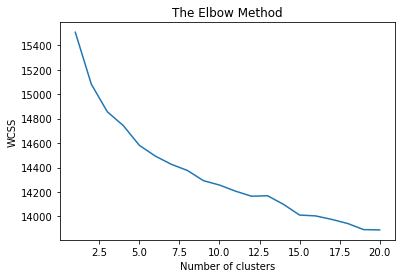

In [63]:
wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(text_tokens_tfidf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,21),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.savefig('elbow.png')
plt.show()

In [64]:
### Clustering Hierarchical?

In [65]:
kMean = KMeans(n_clusters=10,)
kMean.fit(text_tokens_tfidf)

print("Top terms per cluster:")
common = kMean.cluster_centers_.argsort()[:, ::-1]
print(common)
terms = tf.get_feature_names_out()
for i in range(10):
    print("Cluster:",i),
    for ind in common[i, :50]:
        print(terms[ind])
    print('\n')

Top terms per cluster:
[[5467 6917 1856 ... 3254 3252 7071]
 [4627 6348 2186 ... 4714 4715    0]
 [1634 6783 5527 ... 3673 3672 3535]
 ...
 [ 569 6661 3266 ... 4703 4704    0]
 [ 262 1896 4629 ... 4143 4146    0]
 [5527 6385 3631 ... 4544 4545    0]]
Cluster: 0
seat
wifi
door
carriage
toilet
class
table
people
dont
air
like
im
open
station
heating
service
window
work
new
london
southernrailuk
rubbish
time
mask
got
hi
day
passenger
working
need
st
coach
thanks
brighton
good
morning
floor
know
driver
platform
think
make
look
graffiti
ive
ticket
use
gnrailuk
doesnt
year


Cluster: 1
plat
time
expected
northern
great
peterborough
delayed
lner
king
horsham
cambridge
cross
cancelled
moorgate
north
emr
brighton
garden
welwyn
hertford
leeds
london
city
midland
wattonatstone
edinburgh
nottingham
pancras
airport
gatwick
bus
st
royston
bletchley
lynn
west
hull
ely
east
railway
central
york
bradford
derby
bridge
newark
grand
intl
corby
gate


Cluster: 2
delayed
waiting
service
wait
cancelled
platf

In [67]:
tweet_dd

,source_created_at,author_id,text,source,language,longitude,latitude,id,source_id,tweet_id,user_id,relevant,topic,ground_truth,sentiment
0,2020-09-18 21:56:20.798000,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,NaN,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,True,service,True,negative
1,2020-10-13 07:31:53.122000,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,NaN,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,negative
2,2020-10-26 19:27:24.695000,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,NaN,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,True,toilets,True,negative
3,2020-10-26 19:28:49.281000,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,NaN,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,True,toilets,True,negative
4,2020-09-28 11:59:41.212000,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,NaN,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,True,seats,True,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16944,2019-07-11 07:34:35,24940900,Haha oh man the audio corruption on @TLRailUK ...,brandwatch,en-GB,NaN,NaN,b47948df-1732-7021-ee77-238f839a2ea0,1149220424313708544,b47948df-1732-7021-ee77-238f839a2ea0,Z003XDCS,True,announcements,True,neutral
16945,2020-08-10 11:19:10.181000,63559912,@TLRailUK SweetIs there a plug to charge my ph...,sprinklr,en,-0.12574,51.50853,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,NaN,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,Z003XDCS,True,plugs,True,neutral
16946,2020-08-29 09:51:10.833000,277455263,@TLRailUK now there are far fewer commuters ha...,sprinklr,en,-0.12574,51.50853,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,NaN,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,Z003XDCS,True,tables,True,neutral
16947,2020-11-02 12:06:06.967000,3050957613,@geofftech I am voting for Thameslink. 1. in a...,sprinklr,en,-0.12574,51.50853,859ab156-cad3-3bf0-4b6d-de494b483501,NaN,859ab156-cad3-3bf0-4b6d-de494b483501,Z003XDCS,True,toilets,True,neutral


In [88]:
delayed_tweets = tweet_dd.loc[(tweet_dd.topic == "delays")]

In [89]:
delayed_tweets

,source_created_at,author_id,text,source,language,longitude,latitude,id,source_id,tweet_id,user_id,relevant,topic,ground_truth,sentiment
1,2020-10-13 07:31:53.122000,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.125740,51.508530,5b92aba8-4b05-6c63-8485-e9c870742137,NaN,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,negative
5,2020-10-12 10:08:17.434000,1279069355226120195,@TLRailUK @SW_Help @SouthernRailUK @TfL Yyyiou...,sprinklr,en,-0.125740,51.508530,f523d8ef-40f9-f582-c593-98a90e62a6e4,NaN,f523d8ef-40f9-f582-c593-98a90e62a6e4,Z003XDCS,True,delays,True,negative
9,2020-08-13 18:58:23.281000,759412872472588288,@TLRailUK announced a cancelled train > 2 mins...,sprinklr,en,-0.333330,51.750000,c0abe7a3-5bd8-d70a-b6dc-b05c4eb6c6e8,NaN,c0abe7a3-5bd8-d70a-b6dc-b05c4eb6c6e8,Z003XDCS,True,delays,True,negative
18,2020-10-29 15:43:08.726000,1005169688521986048,If you have a car park permit at a Great North...,sprinklr,en,-1.281620,53.340610,73b82301-84b1-db0f-1f23-439643376bae,NaN,73b82301-84b1-db0f-1f23-439643376bae,Z003XDCS,True,delays,True,neutral
22,2020-10-13 12:42:28.897000,1082311161721380864,We're currently experiencing signalling proble...,sprinklr,en,-1.087080,51.262490,c7537861-d0c0-a88b-ef4b-5d330e032bb4,NaN,c7537861-d0c0-a88b-ef4b-5d330e032bb4,Z003XDCS,True,delays,True,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16725,2020-01-09 09:19:50,844681582065696769,Thameslink at Bedford; en route to Elstree for...,brandwatch,en-GB,-0.479444,52.136391,960b36f2-3d5e-bfac-13e9-1e9f5eec3a3d,1215201504379850755,960b36f2-3d5e-bfac-13e9-1e9f5eec3a3d,Z003XDCS,True,delays,True,negative
16750,2019-10-24 07:55:55,398717488,The 7.15 wrh to lbg train is ALWAYS delayed by...,brandwatch,en-GB,NaN,NaN,75f75912-42d7-ca76-f0b5-9480ccd00e90,1187276520798199809,75f75912-42d7-ca76-f0b5-9480ccd00e90,Z003XDCS,True,delays,True,negative
16801,2019-07-24 07:31:11,22371629,Well done @TLRailUK again 😠 8:16 SAC to Bright...,brandwatch,en-GB,NaN,NaN,f823762a-a990-4add-83d1-0a9b4d086f3e,1153930612052516865,f823762a-a990-4add-83d1-0a9b4d086f3e,Z003XDCS,True,delays,True,negative
16807,2020-02-15 11:00:53,1228634078485893121,What a total joke on starting my hen do @LNER ...,brandwatch,en,NaN,NaN,7cab1161-6f2d-c308-1be0-fbeb9f43422b,1228635285891768320,7cab1161-6f2d-c308-1be0-fbeb9f43422b,Z003XDCS,True,delays,True,negative


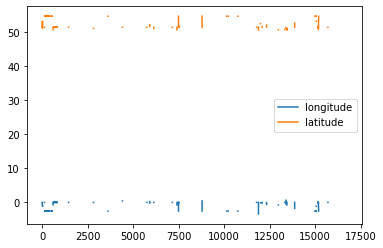

In [93]:
from matplotlib import pyplot
delayed_tweets.plot()
pyplot.show()

In [94]:
delayed_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 16843
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source_created_at  8823 non-null   object 
 1   author_id          8823 non-null   object 
 2   text               8823 non-null   object 
 3   source             8823 non-null   object 
 4   language           8823 non-null   object 
 5   longitude          512 non-null    float64
 6   latitude           512 non-null    float64
 7   id                 8823 non-null   object 
 8   source_id          8316 non-null   object 
 9   tweet_id           8823 non-null   object 
 10  user_id            8823 non-null   object 
 11  relevant           8823 non-null   bool   
 12  topic              8823 non-null   object 
 13  ground_truth       8823 non-null   bool   
 14  sentiment          8823 non-null   object 
dtypes: bool(2), float64(2), object(11)
memory usage: 982.2+ KB


In [95]:
delayed_tweets['source_created_at_converted'] = pd.to_datetime(delayed_tweets.source_created_at)

C:\Users\Ekin\AppData\Local\Temp/ipykernel_9560/1566316746.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
delayed_tweets

,source_created_at,author_id,text,source,language,longitude,latitude,id,source_id,tweet_id,user_id,relevant,topic,ground_truth,sentiment,source_created_at_converted
1,2020-10-13 07:31:53.122000,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.125740,51.508530,5b92aba8-4b05-6c63-8485-e9c870742137,NaN,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,negative,2020-10-13 07:31:53.122
5,2020-10-12 10:08:17.434000,1279069355226120195,@TLRailUK @SW_Help @SouthernRailUK @TfL Yyyiou...,sprinklr,en,-0.125740,51.508530,f523d8ef-40f9-f582-c593-98a90e62a6e4,NaN,f523d8ef-40f9-f582-c593-98a90e62a6e4,Z003XDCS,True,delays,True,negative,2020-10-12 10:08:17.434
9,2020-08-13 18:58:23.281000,759412872472588288,@TLRailUK announced a cancelled train > 2 mins...,sprinklr,en,-0.333330,51.750000,c0abe7a3-5bd8-d70a-b6dc-b05c4eb6c6e8,NaN,c0abe7a3-5bd8-d70a-b6dc-b05c4eb6c6e8,Z003XDCS,True,delays,True,negative,2020-08-13 18:58:23.281
18,2020-10-29 15:43:08.726000,1005169688521986048,If you have a car park permit at a Great North...,sprinklr,en,-1.281620,53.340610,73b82301-84b1-db0f-1f23-439643376bae,NaN,73b82301-84b1-db0f-1f23-439643376bae,Z003XDCS,True,delays,True,neutral,2020-10-29 15:43:08.726
22,2020-10-13 12:42:28.897000,1082311161721380864,We're currently experiencing signalling proble...,sprinklr,en,-1.087080,51.262490,c7537861-d0c0-a88b-ef4b-5d330e032bb4,NaN,c7537861-d0c0-a88b-ef4b-5d330e032bb4,Z003XDCS,True,delays,True,neutral,2020-10-13 12:42:28.897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16725,2020-01-09 09:19:50,844681582065696769,Thameslink at Bedford; en route to Elstree for...,brandwatch,en-GB,-0.479444,52.136391,960b36f2-3d5e-bfac-13e9-1e9f5eec3a3d,1215201504379850755,960b36f2-3d5e-bfac-13e9-1e9f5eec3a3d,Z003XDCS,True,delays,True,negative,2020-01-09 09:19:50.000
16750,2019-10-24 07:55:55,398717488,The 7.15 wrh to lbg train is ALWAYS delayed by...,brandwatch,en-GB,NaN,NaN,75f75912-42d7-ca76-f0b5-9480ccd00e90,1187276520798199809,75f75912-42d7-ca76-f0b5-9480ccd00e90,Z003XDCS,True,delays,True,negative,2019-10-24 07:55:55.000
16801,2019-07-24 07:31:11,22371629,Well done @TLRailUK again 😠 8:16 SAC to Bright...,brandwatch,en-GB,NaN,NaN,f823762a-a990-4add-83d1-0a9b4d086f3e,1153930612052516865,f823762a-a990-4add-83d1-0a9b4d086f3e,Z003XDCS,True,delays,True,negative,2019-07-24 07:31:11.000
16807,2020-02-15 11:00:53,1228634078485893121,What a total joke on starting my hen do @LNER ...,brandwatch,en,NaN,NaN,7cab1161-6f2d-c308-1be0-fbeb9f43422b,1228635285891768320,7cab1161-6f2d-c308-1be0-fbeb9f43422b,Z003XDCS,True,delays,True,negative,2020-02-15 11:00:53.000


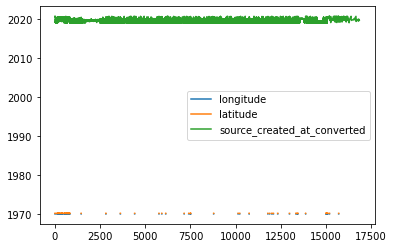

In [97]:
from matplotlib import pyplot
delayed_tweets.plot()
pyplot.show()

In [102]:
delayed_tweets_nogps=delayed_tweets.drop(columns=['longitude','latitude'])

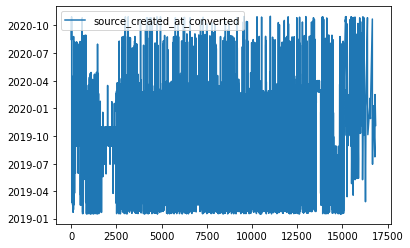

In [104]:
from matplotlib import pyplot
delayed_tweets_nogps.plot()
pyplot.show()

In [107]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper


groups = delayed_tweets_nogps.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'